<a href="https://colab.research.google.com/github/freesky3/python-machine-learning/blob/main/PyTorch_Recipes/Basics/defining_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

Defining a Neural Network in PyTorch
====================================

Deep learning uses artificial neural networks (models), which are
computing systems that are composed of many layers of interconnected
units. By passing data through these interconnected units, a neural
network is able to learn how to approximate the computations required to
transform inputs into outputs. In PyTorch, neural networks can be
constructed using the `torch.nn` package.

Introduction
------------

PyTorch provides the elegantly designed modules and classes, including
`torch.nn`, to help you create and train neural networks. An `nn.Module`
contains layers, and a method `forward(input)` that returns the
`output`.

In this recipe, we will use `torch.nn` to define a neural network
intended for the [MNIST
dataset](hhttps://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

Setup
-----

Before we begin, we need to install `torch` if it isn't already
available.

    pip install torch


Steps
=====

1.  Import all necessary libraries for loading our data
2.  Define and initialize the neural network
3.  Specify how data will pass through your model
4.  \[Optional\] Pass data through your model to test

1. Import necessary libraries for loading our data
--------------------------------------------------

For this recipe, we will use `torch` and its subsidiaries `torch.nn` and
`torch.nn.functional`.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

2. Define and initialize the neural network
===========================================

Our network will recognize images. We will use a process built into
PyTorch called convolution. Convolution adds each element of an image to
its local neighbors, weighted by a kernel, or a small matrix, that helps
us extract certain features (like edge detection, sharpness, blurriness,
etc.) from the input image.

There are two requirements for defining the `Net` class of your model.
The first is writing an \_\_init\_\_ function that references
`nn.Module`. This function is where you define the fully connected
layers in your neural network.

Using convolution, we will define our model to take 1 input image
channel, and output match our target of 10 labels representing numbers 0
through 9. This algorithm is yours to create, we will follow a standard
MNIST algorithm.


In [2]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.conv1 = nn.Conv2d(1, 32, 3, 1) # 1是卷积步长stride
      # Second 2D convolutional layer, taking in the 32 input layers,
      # outputting 64 convolutional features, with a square kernel size of 3
      self.conv2 = nn.Conv2d(32, 64, 3, 1)

      # Designed to ensure that adjacent pixels are either all 0s or all active
      # with an input probability
      # Dropout 会随机将输入张量的某些通道（channel）置为 0。括号里是置为零的概率
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)

      # First fully connected layer
      self.fc1 = nn.Linear(9216, 128)
      # Second fully connected layer that outputs our 10 labels
      self.fc2 = nn.Linear(128, 10)

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


We have finished defining our neural network, now we have to define how
our data will pass through it.

3. Specify how data will pass through your model
================================================

When you use PyTorch to build a model, you just have to define the
`forward` function, that will pass the data into the computation graph
(i.e. our neural network). This will represent our feed-forward
algorithm.

You can use any of the Tensor operations in the `forward` function.


In [4]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      self.conv2 = nn.Conv2d(32, 64, 3, 1)
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)
      self.fc1 = nn.Linear(9216, 128)
      self.fc2 = nn.Linear(128, 10)

    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x) # 1*32*26*26
      # Use the rectified-linear activation function over x
      x = F.relu(x) # 1*64*24*24

      x = self.conv2(x)
      x = F.relu(x)

      # Run max pooling over x
      x = F.max_pool2d(x, 2) # 1*64*12*12 = 9216
      # Pass data through dropout1
      x = self.dropout1(x)
      # Flatten x with start_dim=1
      x = torch.flatten(x, 1)
      # Pass data through ``fc1``
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # Apply softmax to x
      output = F.log_softmax(x, dim=1)
      return output

4. \[Optional\] Pass data through your model to test
====================================================

To ensure we receive our desired output, let's test our model by passing
some random data through it.


[[-2.2968934 -2.2163343 -2.2288694 -2.3337562 -2.2643187 -2.4268255
  -2.3595994 -2.2541287 -2.3362994 -2.3277502]]
[[0.1005708  0.10900796 0.10765007 0.09693097 0.1039008  0.08831675
  0.09445806 0.10496496 0.09668477 0.09751489]]
1.0


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


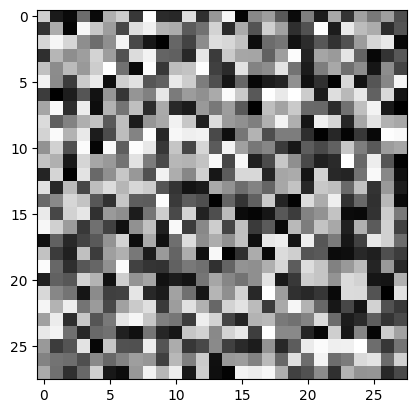

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Equates to one random 28x28 image
random_data = torch.rand((1, 1, 28, 28)) # 1个样本，1个通道，28高，28宽

img = random_data.squeeze()
plt.imshow(img, cmap="gray")

my_nn = Net()
result = my_nn(random_data)
result = result.detach().numpy()
print (result)
print(np.exp(result))
print(np.exp(result).sum())

Each number in this resulting tensor equates to the prediction of the
label the random tensor is associated to.

Congratulations! You have successfully defined a neural network in
PyTorch.

Learn More
==========

Take a look at these other recipes to continue your learning:

-   [What is a state\_dict in
    PyTorch](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)
-   [Saving and loading models for inference in
    PyTorch](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html)
